In [1]:
pip install opencv-python

In [2]:
pip install tensorflow

In [3]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [11]:
print(tf.version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\neelk\\anaconda3\\New folder\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [8]:
fldir=r"C:\Users\neelk\Downloads\Age Gender Detection\UTKFace"
fldir

'C:\\Users\\neelk\\Downloads\\Age Gender Detection\\UTKFace'

In [9]:
import os

In [10]:
files=os.listdir(fldir)

# Create a list of images from dataset

In [11]:
ages=[]
genders=[]
images=[]

for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    total=fldir+'/'+file
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
C:\Users\neelk\Downloads\Age Gender Detection\UTKFace/10_0_0_2017010320

## Create a list of age and gender from dataset

In [13]:
for file in files:
    age=int(file.split('_')[0])
    gender=int(file.split('_')[1])
    ages.append(age)
    genders.append(gender)

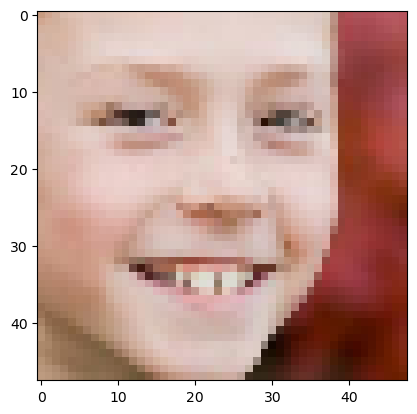

In [14]:
plt.imshow(images[60])

In [17]:
print(ages[90])

10


In [18]:
print(genders[87])

0


# Saving arrays of images,ages and genders in the system

In [19]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [20]:
np.save(fldir+'image.npy',images_f)
np.save(fldir+'age.npy',ages_f)
np.save(fldir+'gender.npy',genders_f)

# Finding the male and female samples respectively

In [15]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12389 11309]


# Plotting the no. of male and female samples

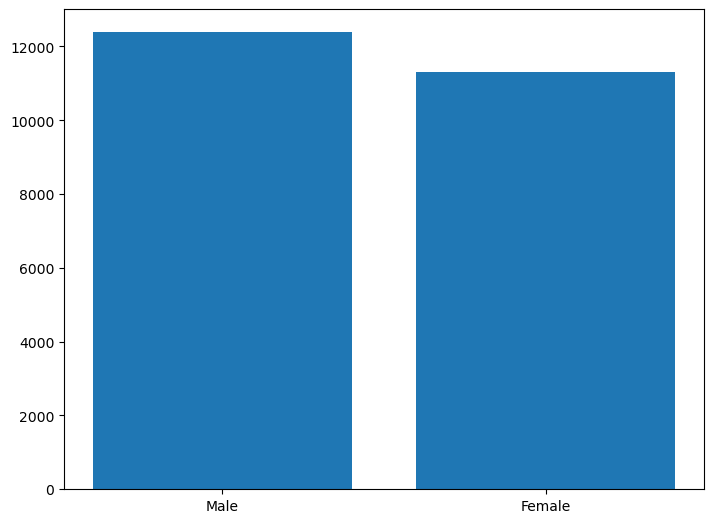

In [16]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12389,11309]
ax.bar(gender,values)
plt.show()

# Finding the no. of samples in each age

In [17]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9    1    2
    1    5    5    1    3    4]


# Converting age counts to lists

In [18]:
val=values.tolist()
cnt=counts.tolist()

# Plotting the samples agewise

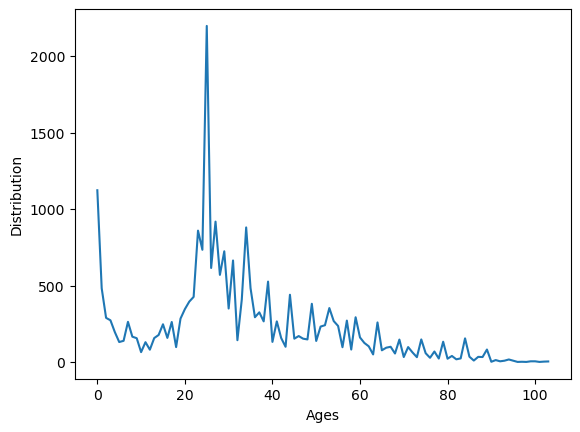

In [19]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [20]:
len(genders)

23698

# Define labels for o/p

In [21]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

# Create another list of images from existing one

In [22]:
images_f_2=images_f/255
images_f_2

array([[[[0.66666667, 0.41176471, 0.13333333],
         [0.65490196, 0.40784314, 0.11764706],
         [0.67058824, 0.43529412, 0.14901961],
         ...,
         [0.88235294, 0.70196078, 0.56078431],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.67058824, 0.41568627, 0.1372549 ],
         [0.65882353, 0.41568627, 0.12156863],
         [0.63529412, 0.4       , 0.11764706],
         ...,
         [0.89803922, 0.71764706, 0.57647059],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.72941176, 0.4745098 , 0.19607843],
         [0.63921569, 0.39607843, 0.10196078],
         [0.65098039, 0.41568627, 0.13333333],
         ...,
         [0.96862745, 0.78431373, 0.64705882],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.39607843, 0.19607843, 0.01176471],
         [0.56862745, 0.3254902 , 0.11372549]

In [23]:
images_f_2.shape

(23698, 48, 48, 3)

In [24]:
labels_f=np.array(labels)

# Splitting the dataset 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [27]:
y_train[0:5]

array([[41,  0],
       [13,  1],
       [20,  0],
       [38,  1],
       [38,  0]])

# Further splitting 'y_train' and 'y_test'

In [28]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [29]:
y_train_2[0][0:5]

array([0, 1, 0, 1, 0])

In [30]:
y_train_2[1][0:5]

array([41, 13, 20, 38, 38])

# Defining the model

In [22]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [23]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2,))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_output')(drop_1)
    output_2=Dense(1,activation='relu',name='age_output')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=[['accuracy'],['accuracy']])
    return model
    

In [24]:
Model=model((48,48,3))

In [25]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 48, 48, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 48, 48, 32)        │               0 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 32)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 24, 24, 64)        │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 64)        │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 12, 12, 128)       │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 12, 12, 128)       │               0 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 128)         │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 6, 6, 256)         │               0 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Model Initialization

In [36]:
file_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

# Running the Model

In [37]:
History=Model.fit(X_train,y_train_2,batch_size=64,validation_data=(X_test,y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - age_output_accuracy: 0.0477 - loss: 18.4529 - sex_output_accuracy: 0.5597
Epoch 1: val_loss improved from inf to 15.12311, saving model to Age_Sex_Detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 55s 187ms/step - age_output_accuracy: 0.0477 - loss: 18.4473 - sex_output_accuracy: 0.5598 - val_age_output_accuracy: 0.0432 - val_loss: 15.1231 - val_sex_output_accuracy: 0.6552
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - age_output_accuracy: 0.0480 - loss: 14.8071 - sex_output_accuracy: 0.6657
Epoch 2: val_loss did not improve from 15.12311
278/278 ━━━━━━━━━━━━━━━━━━━━ 52s 186ms/step - age_output_accuracy: 0.0480 - loss: 14.8039 - sex_output_accuracy: 0.6658 - val_age_output_accuracy: 0.0370 - val_loss: 15.5217 - val_sex_output_accuracy: 0.7536
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - age_output_accuracy: 0.0450 - loss: 11.7246 - sex_output_accuracy: 0.7385
Epoch 3: val_loss improved from 15.12311 to 12.09637, 

# Model Evaluation

In [38]:
Model.evaluate(X_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - age_output_accuracy: 0.0380 - loss: 7.4457 - sex_output_accuracy: 0.8896


[7.439250946044922, 0.043206751346588135, 0.8869198560714722]

In [39]:
pred=Model.predict(X_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


In [40]:
pred[1]

array([[39.543697],
       [47.3105  ],
       [22.389038],
       ...,
       [25.067913],
       [18.828842],
       [43.356777]], dtype=float32)

# Plotting Loss

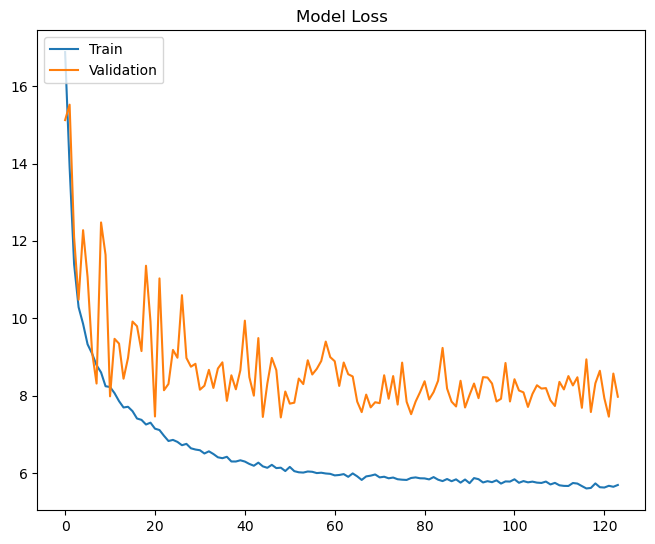

In [41]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting Sex Accuracy

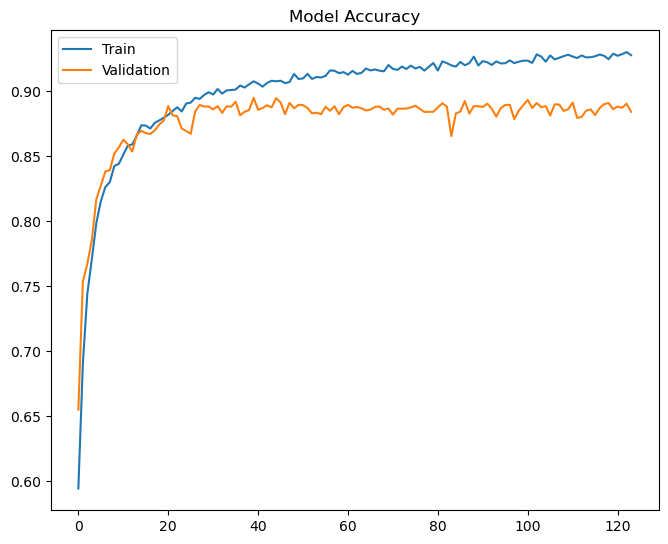

In [42]:
plt.plot(History.history['sex_output_accuracy'])
plt.plot(History.history['val_sex_output_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# Plotting Gender Accuracy 

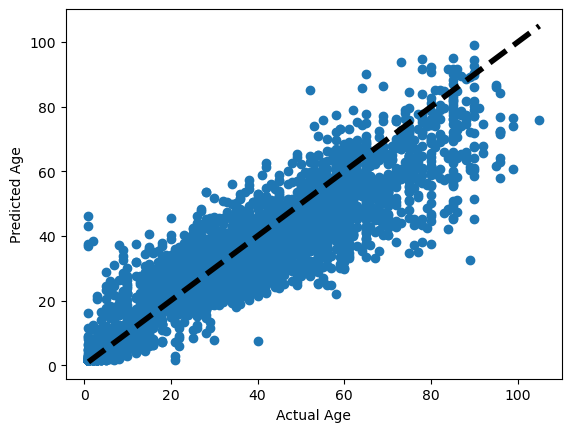

In [43]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# Making Report of the Model(Gender only) 

In [44]:
i=0
Pred_1=[]
while(i<len(pred[0])):
    Pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
report=classification_report(y_test_2[0],Pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3079
           1       0.89      0.87      0.88      2846

    accuracy                           0.89      5925
   macro avg       0.89      0.89      0.89      5925
weighted avg       0.89      0.89      0.89      5925



# Making heat map of the model(Gender only)

In [50]:
import seaborn as sns

In [51]:
results=confusion_matrix(y_test_2[0],Pred_1)

<Axes: >

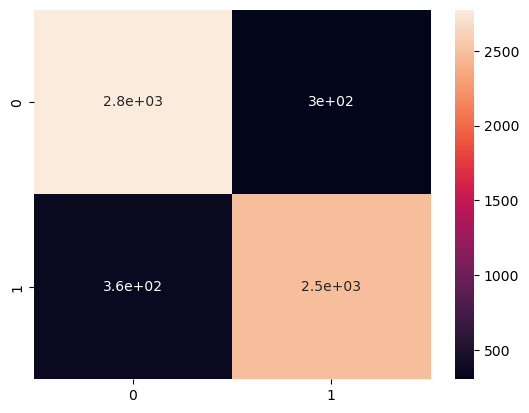

In [52]:
sns.heatmap(results,annot=True)

# Testing the images

In [53]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is"+ str(age))
    print("Predicted Gender is"+ sex_f[sex])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted Age is76
Predicted Gender isMale


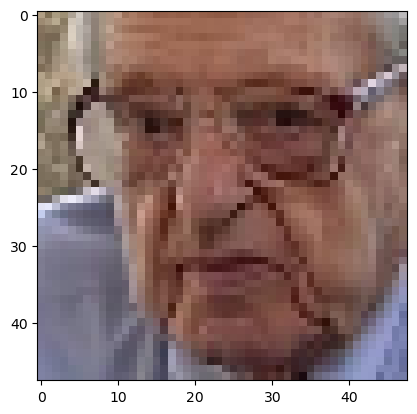

In [54]:
test_image(4,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Age is3
Predicted Gender isMale


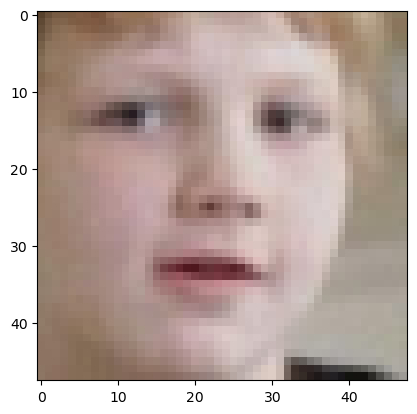

In [55]:
test_image(40,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Age is7
Predicted Gender isFemale


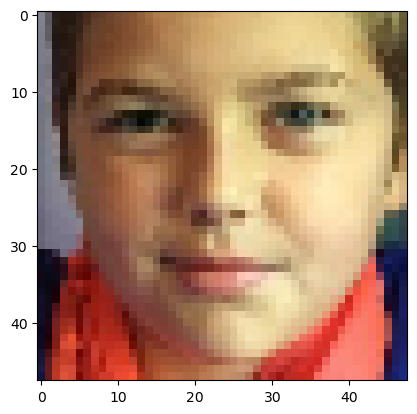

In [56]:
test_image(230,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Age is12
Predicted Gender isFemale


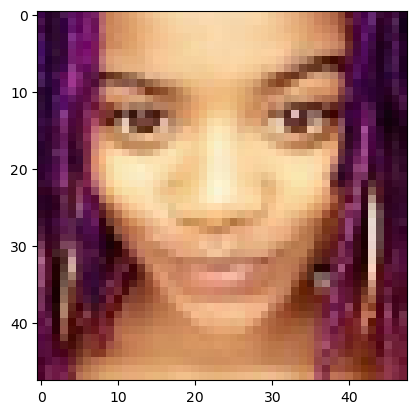

In [57]:
test_image(1000,images_f,images_f_2,Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Age is22
Predicted Gender isMale


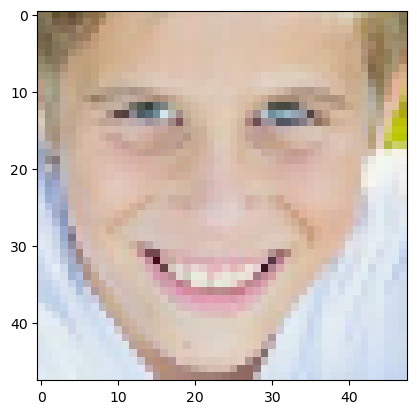

In [58]:
test_image(398,images_f,images_f_2,Model)